### Root Finding Using Bisection

In [1]:
# Original source: https://wiki.sagemath.org/interact/calculus#Root_Finding_Using_Bisection

def bisect_method(f, a, b, eps):
    """
    Compute the root of the function f using the bisection method.

    Parameters:
        f (function): The function to find the root of.
        a (float): The left endpoint of the interval.
        b (float): The right endpoint of the interval.
        eps (float): The tolerance for convergence.

    Returns:
        tuple: A tuple containing the root and a list of intervals used during the iteration.
    """
    try:
        f = f._fast_float_(f.variables()[0])
    except AttributeError:
        pass
    intervals = [(a,b)]
    two = float(2); eps = float(eps)
    while True:
        c = (a+b)/two
        fa = f(a); fb = f(b); fc = f(c)
        if abs(fc) < eps: return c, intervals
        if fa*fc < 0:
            a, b = a, c
        elif fc*fb < 0:
            a, b = c, b
        else:
            raise ValueError("f must have a sign change in the interval (%s,%s)"%(a,b))
        intervals.append((a,b))

pretty_print(html("<h1>Double Precision Root Finding Using Bisection</h1>"))

@interact
def _(f = cos(x) - x, a = float(0),  b=slider(0, 4, step_size=0.1, default=1), eps=(-3,(-16, -1))):
     eps = 10^eps
     print("eps = %s" % float(eps))
     try:
        f(x) = f
        c, intervals = bisect_method(f=f, a=a, b=b, eps=eps)
     except ValueError:
         print("f must have opposite sign at the endpoints of the interval")
         show(plot(f, a, b, color='red'), xmin=a, xmax=b)
     else:
         print("root =", c)
         print("f(c) = %r" % f(x=c))
         print("iterations =", len(intervals))
         #print(intervals)
         P = plot(f, a, b, color='red')
         h = (P.ymax() - P.ymin())/ (1.5*len(intervals))
         L = sum(line([(c,h*i), (d,h*i)]) for i, (c,d) in enumerate(intervals) )
         L += sum(line([(c,h*i-h/4), (c,h*i+h/4)]) for i, (c,d) in enumerate(intervals) )
         L += sum(line([(d,h*i-h/4), (d,h*i+h/4)]) for i, (c,d) in enumerate(intervals) )
         show(P + L, xmin=a, xmax=b)

<h1>Double Precision Root Finding Using Bisection</h1>

Interactive function <function _ at 0x72a151585240> with 4 widgets
  f: EvalText(value='-x + cos(x)', description='f')
  a: FloatSlider(value=0.0, description='a', max=1.0)
  b: TransformFloatSlider(value=1.0, description='b', max=4.0)
  eps: IntSlider(value=-3, description='eps', max=-1, min=-16)

root = 1.734375
f(c) = 0.008056640625
iterations = 8


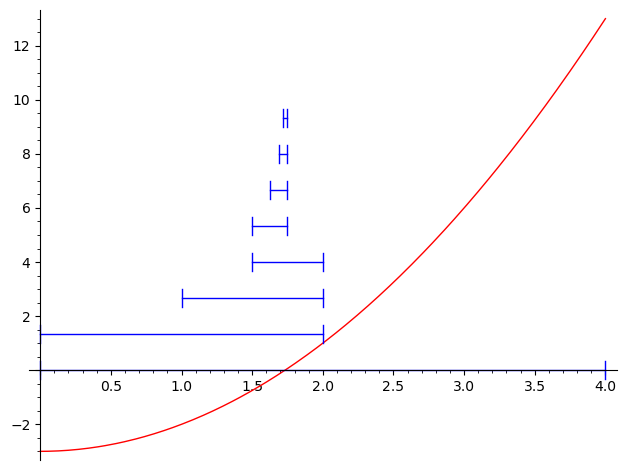

In [2]:
f = (x^2 - 3)
a = 0
b = 4
eps = 0.01

try:
    f(x) = f
    c, intervals = bisect_method(f=f, a=a, b=b, eps=eps)
except ValueError:
    print("f must have opposite sign at the endpoints of the interval")
    show(plot(f, a, b, color='red'), xmin=a, xmax=b)
else:
    print("root =", c)
    print("f(c) = %r" % f(x=c))
    print("iterations =", len(intervals))
    #print(intervals)
    P = plot(f, a, b, color='red')
    h = (P.ymax() - P.ymin())/ (1.5*len(intervals))
    L = sum(line([(c,h*i), (d,h*i)]) for i, (c,d) in enumerate(intervals) )
    L += sum(line([(c,h*i-h/4), (c,h*i+h/4)]) for i, (c,d) in enumerate(intervals) )
    L += sum(line([(d,h*i-h/4), (d,h*i+h/4)]) for i, (c,d) in enumerate(intervals) )
    show(P + L, xmin=a, xmax=b)